## Import packages

In [1]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib as mplt
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3
urllib3.disable_warnings()



## Import Data

In [1]:
# Replace *** with own URL and KEY 
# Sign in "https://cds.climate.copernicus.eu/#!/home"

URL = '***'
KEY = '***'
DATADIR1 = './'

In [4]:
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': [
            '2m_temperature', 'total_precipitation',
        ],
        'year': '2023',
        'month': '07',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'format': 'netcdf',
        'area': [
            72, -25, 34,
            40,
        ],
    },
    f'{DATADIR1}era5_houerly_temp_precip_eur.nc')

2023-11-11 19:26:54,715 INFO Welcome to the CDS
2023-11-11 19:26:54,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-11-11 19:26:54,885 INFO Request is queued
2023-11-11 19:26:55,920 INFO Request is running
2023-11-11 19:31:13,255 INFO Request is completed
2023-11-11 19:31:13,256 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/adaptor.mars.internal-1699727439.2563796-23434-15-c38ceff7-2036-4e87-b71a-75e2f1e808d4.nc to GIF/era5_houerly_temp_precip_eur.nc (704M)
2023-11-11 19:32:44,682 INFO Download rate 7.7M/s  


Result(content_length=738148672,content_type=application/x-netcdf,location=https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/adaptor.mars.internal-1699727439.2563796-23434-15-c38ceff7-2036-4e87-b71a-75e2f1e808d4.nc)

## Read, select and convert Units of the Data

In [3]:
# Variable for Dataset
houerly_data = f'{DATADIR1}era5_houerly_temp_precip_eur.nc'

# Open Dataset
dataset = xr.open_dataset(houerly_data)

# Select specific variables using DataArray constructor
temp_data = xr.DataArray(dataset['t2m']).rename('Temperatur °C')
tp_data = xr.DataArray(dataset['tp']).rename('Niederschlag mm')

# Convert Kelvin to Celcius
temp_data_degc = temp_data - 273.15
temp_data_degc = temp_data_degc.assign_attrs(temp_data.attrs)
temp_data_degc.attrs['units'] = '°C'
temp_data_degc

# Convert precipitation from meters to millimeters
tp_data_mm = tp_data * 1000
tp_data_mm.attrs['units'] = 'mm'



## Aggregate from Houerly to Daily and calculate mean, max & sum for Temperature and Precipitation

In [4]:
# Daily Mean for Temperature
temp_daily_mean = temp_data_degc.resample(time='D').mean()

# Daily Maximum for Temperature
temp_daily_max = temp_data_degc.resample(time='D').max()

# Daily Mean for Precipitation
tp_daily_mean = tp_data_mm.resample(time='D').mean()

# Daily Sum for Precipitation
tp_daily_sum = tp_data_mm.resample(time='D').sum()

# Create a land-sea mask based on non-missing values in the original temperature data
land_sea_mask = xr.where(tp_data.notnull(), 1, 0)

# Apply the land-sea mask to temp_daily_max
tp_daily_sum = tp_daily_sum.where(land_sea_mask == 1)



## Line plots of Temperature and Precipitation

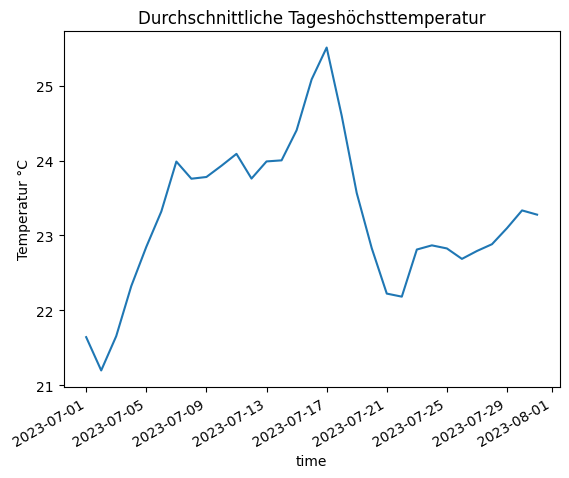

In [16]:
# Code to create the line plot
ax = temp_daily_max.mean(['longitude','latitude']).plot()

plt.title("Durchschnittliche Tageshöchsttemperatur")
plt.subplots_adjust(bottom=0.14)

# Save the plot as an image file (e.g., PNG)
fig = plt.gcf()
fig.savefig("Durchschnittliche_Tageshöchsttemperatur_lineplot.png")

# Display the plot
plt.show()


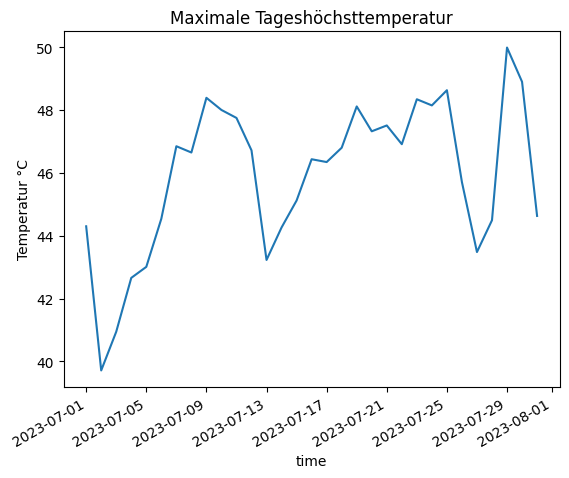

In [17]:
# Code to create the line plot
ax = temp_daily_max.max(['longitude','latitude']).plot()

plt.title("Maximale Tageshöchsttemperatur")
plt.subplots_adjust(bottom=0.14)

# Save the plot as an image file (e.g., PNG)
fig = plt.gcf()
fig.savefig("Maximale_Tageshöchsttemperatur_lineplot.png")

# Display the plot
plt.show()


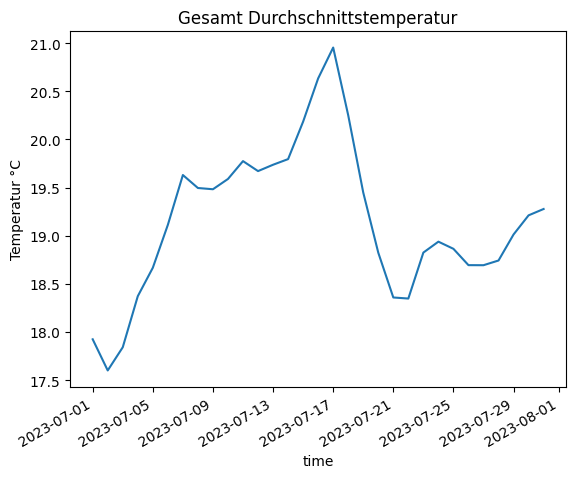

In [18]:
# Code to create the line plot
ax = temp_daily_mean.mean(['longitude','latitude']).plot()

plt.title("Gesamt Durchschnittstemperatur")
plt.subplots_adjust(bottom=0.14)

# Save the plot as an image file (e.g., PNG)
fig = plt.gcf()
fig.savefig("Gesamt_Durchschnittstemperatur_lineplot.png")

# Display the plot
plt.show()


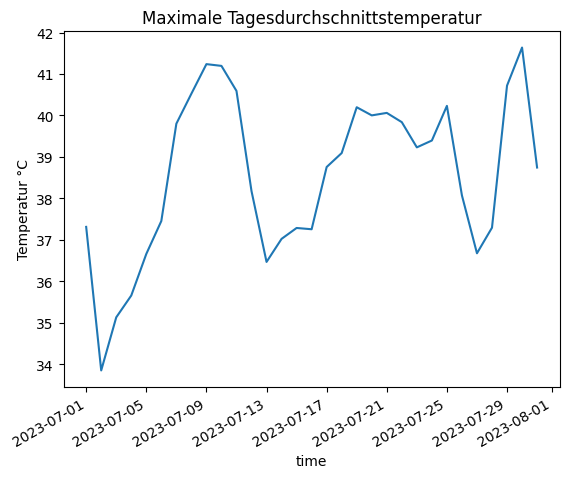

In [19]:
# Code to create the line plot
ax = temp_daily_mean.max(['longitude','latitude']).plot()

plt.title("Maximale Tagesdurchschnittstemperatur")
plt.subplots_adjust(bottom=0.14)

# Save the plot as an image file (e.g., PNG)
fig = plt.gcf()
fig.savefig("Maximale_Tagesdurchschnittstemperatur_lineplot.png")

# Display the plot
plt.show()


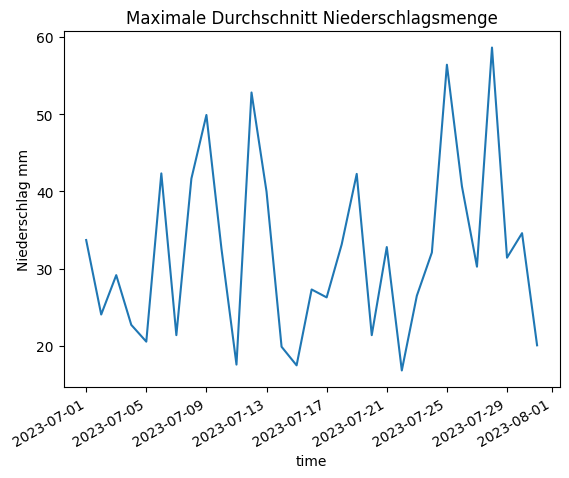

In [20]:
# Code to create the line plot
ax = tp_daily_mean.max(['longitude','latitude']).plot()

plt.title("Maximale Durchschnitt Niederschlagsmenge")
plt.subplots_adjust(bottom=0.14)

# Save the plot as an image file (e.g., PNG)
fig = plt.gcf()
fig.savefig("Maximale Durchschnitt Niederschlagsmenge_lineplot.png")

# Display the plot
plt.show()


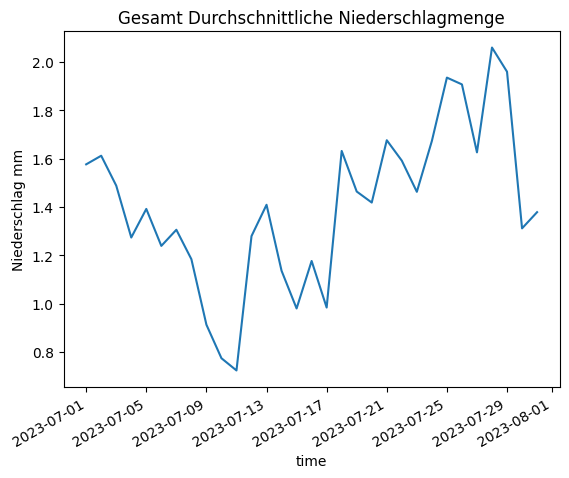

In [21]:
# Code to create the line plot
ax = tp_daily_mean.mean(['longitude','latitude']).plot()

plt.title("Gesamt Durchschnittliche Niederschlagmenge")
plt.subplots_adjust(bottom=0.14)

# Save the plot as an image file (e.g., PNG)
fig = plt.gcf()
fig.savefig("Gesamt_Durchschnittliche_Niederschlagmenge_lineplot.png")

# Display the plot
plt.show()


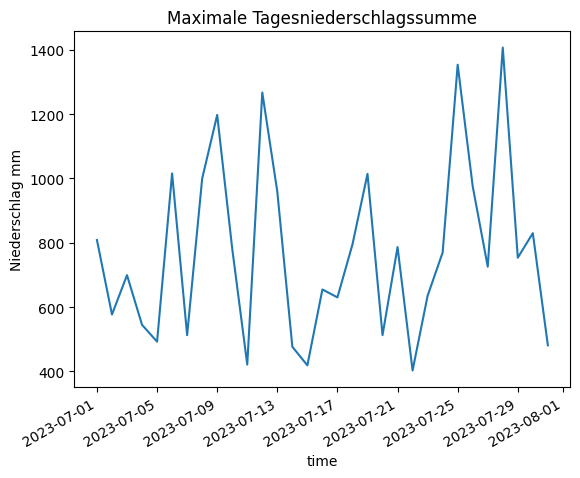

In [22]:
# Code to create the line plot
ax = tp_daily_sum.max(['longitude','latitude']).plot()

plt.title("Maximale Tagesniederschlagssumme")
plt.subplots_adjust(bottom=0.14)

# Save the plot as an image file (e.g., PNG)
fig = plt.gcf()
fig.savefig("Maximale_Tagesniederschlagssumme_lineplot.png")

# Display the plot
plt.show()


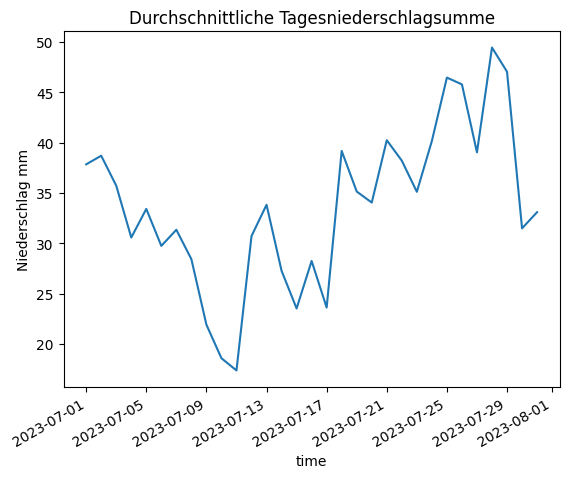

In [23]:
# Code to create the line plot
ax = tp_daily_sum.mean(['longitude','latitude']).plot()

plt.title("Durchschnittliche Tagesniederschlagsumme")
plt.subplots_adjust(bottom=0.14)

# Save the plot as an image file (e.g., PNG)
fig = plt.gcf()
fig.savefig("Durchschnittliche_Tagesniederschlagsumme_lineplot.png")

# Display the plot
plt.show()

## Create Animations/GIFS of daily data

### Temperature Daily Max

MovieWriter ffmpeg unavailable; using Pillow instead.


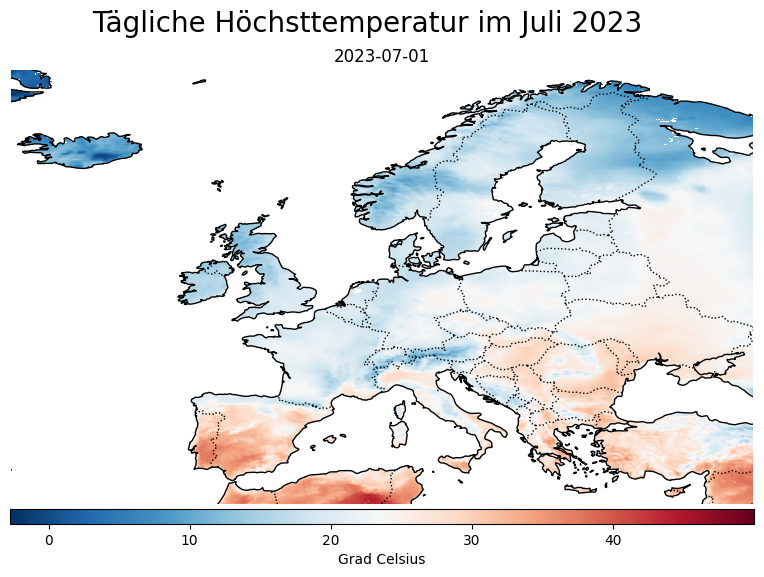

In [11]:
# Create a figure and axes with a Plate Carree projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})


# Set Limits
vmin = temp_daily_max.min()
vmax = temp_daily_max.max()


# Animation
for i in range(31):
    temp_daily_max[i,:,:].plot(
        figsize = (12,6),
        vmin= vmin, vmax= vmax,
        cmap= mplt.colormaps['RdBu_r'],     
        cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 0.8,
            'pad' : 0.01,
            'aspect': 50,
            'spacing': 'proportional',
            'label': 'Grad Celsius'
        }
    )
    plt.close()


# Plot the initial frame
cax = temp_daily_max[i,:,:].plot(
    add_colorbar=True,
    cmap= mplt.colormaps['RdBu_r'],
    vmin= vmin, vmax= vmax,
    cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 0.8,
            'pad' : 0.01,
            'aspect': 50,
            'spacing': 'proportional',
            'label': 'Grad Celsius'
        }
)

# Add coastlines and country borders to the initial frame
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Define a function to update the values for the colormesh and title in each frame
def animate(i):
    plt.box(False)
    plt.suptitle("Tägliche Höchsttemperatur im Juli 2023", fontsize = 20)
    plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    plt.xlabel("")
    plt.ylabel("")
    cax.set_array(temp_daily_max[i,:,:].values.flatten())
    ax.set_title(str(temp_daily_max.coords['time'].values[i])[:10])

# Create an animation using the FuncAnimation module
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames = range(31),       # could also be iterable or list
    interval = 450     # ms between frames
)

# Save the animation as a gif
ani.save('GIF_Tägliche_Höchsttemperatur_im_Juli_023_450ms.gif')

### Temp Daily Mean

MovieWriter ffmpeg unavailable; using Pillow instead.


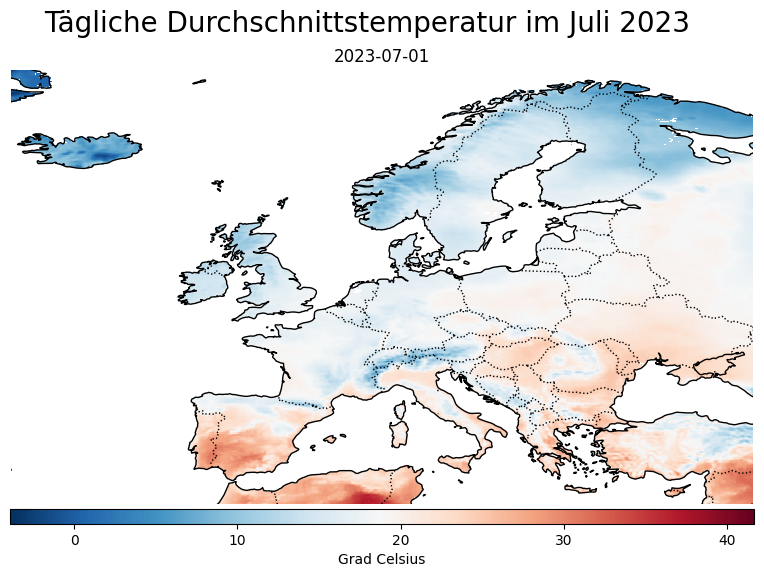

In [12]:
# Create a figure and axes with a Plate Carree projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})


# Set Limits
vmin = temp_daily_mean.min()
vmax = temp_daily_mean.max()


# Animation
for i in range(31):
    temp_daily_mean[i,:,:].plot(
        figsize = (12,6),
        vmin= vmin, vmax= vmax,
        cmap= mplt.colormaps['RdBu_r'],     
        cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 0.8,
            'pad' : 0.01,
            'aspect': 50,
            'spacing': 'proportional',
            'label': 'Grad Celsius'
        }
    )
    plt.close()


# Plot the initial frame
cax = temp_daily_mean[i,:,:].plot(
    add_colorbar=True,
    cmap= mplt.colormaps['RdBu_r'],
    vmin= vmin, vmax= vmax,
    cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 0.8,
            'pad' : 0.01,
            'aspect': 50,
            'spacing': 'proportional',
            'label': 'Grad Celsius'
        }
)

# Add coastlines and country borders to the initial frame
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')


# Define a function to update the values for the colormesh and title in each frame
def animate(i):
    plt.box(False)
    plt.suptitle("Tägliche Durchschnittstemperatur im Juli 2023", fontsize = 20)
    plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    plt.xlabel("")
    plt.ylabel("")
    cax.set_array(temp_daily_mean[i,:,:].values.flatten())
    ax.set_title(str(temp_daily_mean.coords['time'].values[i])[:10])

# Create an animation using the FuncAnimation module
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames = range(31),       # could also be iterable or list
    interval = 450     # ms between frames
)

# Save the animation as a gif
ani.save('GIF_Tägliche_Durchschnittstemperatur_im_Juli_023_450ms.gif')

### Precipitation daily mean

MovieWriter ffmpeg unavailable; using Pillow instead.


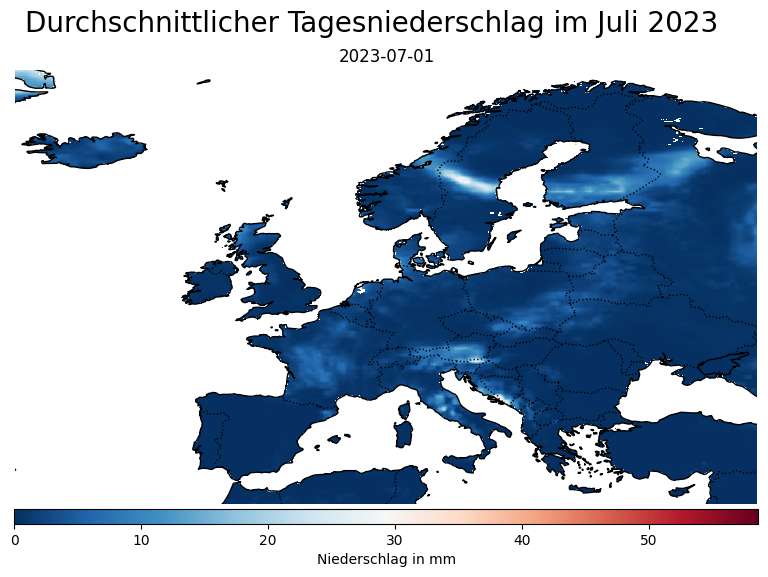

In [8]:
# Create a figure and axes with a Plate Carree projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})


# Set Limits
vmin = tp_daily_mean.min()
vmax = tp_daily_mean.max()


# Animation
for i in range(31):
    tp_daily_mean[i,:,:].plot(
        figsize = (12,6),
        vmin= vmin, vmax= vmax,
        cmap= mplt.colormaps['RdBu_r'],     
        cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 0.8,
            'pad' : 0.01,
            'aspect': 50,
            'spacing': 'proportional',
            'label': 'Niederschlag in mm'
        }
    )
    plt.close()


# Plot the initial frame
cax = tp_daily_mean[i,:,:].plot(
    add_colorbar=True,
    cmap= mplt.colormaps['RdBu_r'],
    vmin= vmin, vmax= vmax,
    cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 0.8,
            'pad' : 0.01,
            'aspect': 50,
            'spacing': 'proportional',
            'label': 'Niederschlag in mm'
        }
)

# Add coastlines and country borders to the initial frame
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')


# Define a function to update the values for the colormesh and title in each frame
def animate(i):
    plt.box(False)
    plt.suptitle("Durchschnittlicher Tagesniederschlag im Juli 2023", fontsize = 20)
    plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    plt.xlabel("")
    plt.ylabel("")
    cax.set_array(tp_daily_mean[i,:,:].values.flatten())
    ax.set_title(str(tp_daily_mean.coords['time'].values[i])[:10])

# Create an animation using the FuncAnimation module
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames = range(31),       # could also be iterable or list
    interval = 450     # ms between frames
)

# Save the animation as a gif
ani.save('GIF_Durchschnittlicher_Tagesniederschlag_im_Juli_023_450ms.gif')

## Precipitation Daily Sum

MovieWriter ffmpeg unavailable; using Pillow instead.


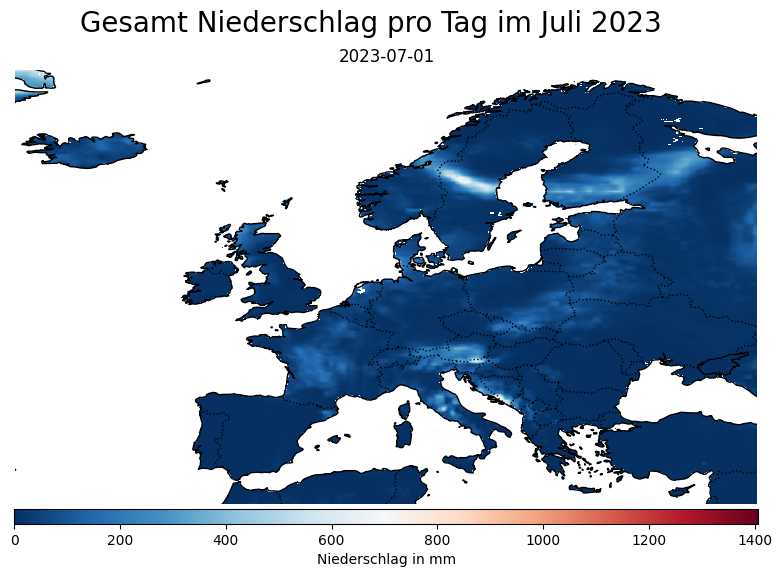

In [7]:
# Create a figure and axes with a Plate Carree projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})


# Set Limits
vmin = tp_daily_sum.min()
vmax = tp_daily_sum.max()


# Animation
for i in range(31):
    tp_daily_sum[i,:,:].plot(
        figsize = (12,6),
        vmin= vmin, vmax= vmax,
        cmap= mplt.colormaps['RdBu_r'],     
        cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 0.8,
            'pad' : 0.01,
            'aspect': 50,
            'spacing': 'proportional',
            'label': 'Niederschlag in mm'
        }
    )
    plt.close()


# Plot the initial frame
cax = tp_daily_sum[i,:,:].plot(
    add_colorbar=True,
    cmap= mplt.colormaps['RdBu_r'],
    vmin= vmin, vmax= vmax,
    cbar_kwargs={
            'extend':'neither',
            'orientation':'horizontal',
            'fraction': 0.05,
            'shrink': 0.8,
            'pad' : 0.01,
            'aspect': 50,
            'spacing': 'proportional',
            'label': 'Niederschlag in mm'
        }
)

# Add coastlines and country borders to the initial frame
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')


# Define a function to update the values for the colormesh and title in each frame
def animate(i):
    plt.box(False)
    plt.suptitle("Gesamt Niederschlag pro Tag im Juli 2023", fontsize = 20)
    plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    plt.xlabel("")
    plt.ylabel("")
    cax.set_array(tp_daily_sum[i,:,:].values.flatten())
    ax.set_title(str(tp_daily_sum.coords['time'].values[i])[:10])

# Create an animation using the FuncAnimation module
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames = range(31),       # could also be iterable or list
    interval = 450     # ms between frames
)

# Save the animation as a gif
ani.save('GIF_Gesamt_Niederschlag_pro_Tag_im_Juli_2023_450ms.gif')